In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#loading dataset
df= pd.read_csv('diabetes.csv')
#first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#viewing dimensions of dataset
df.shape

(768, 9)

In [4]:
#viewing column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#viewing datatypes of columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#To get statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
#for null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

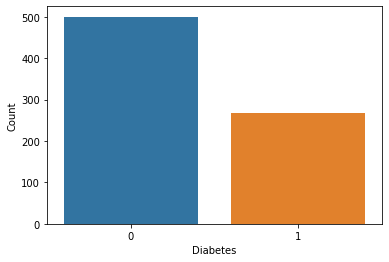

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data visualisation
#count plot for people with and without diabetes
sns.countplot(x='Outcome',data=df)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

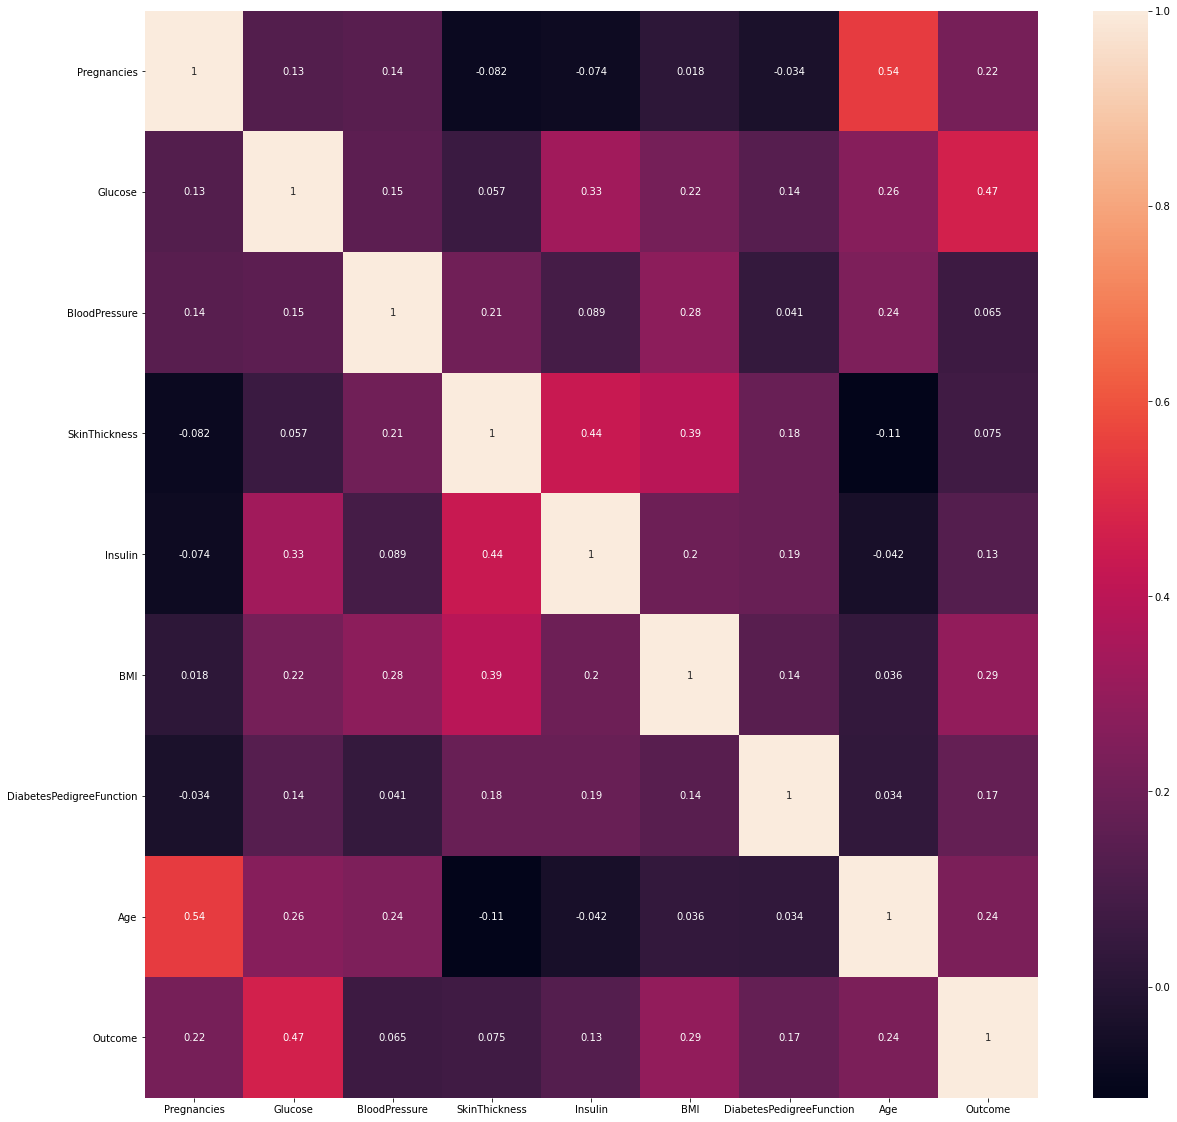

In [10]:
# Correlation matrix
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True)

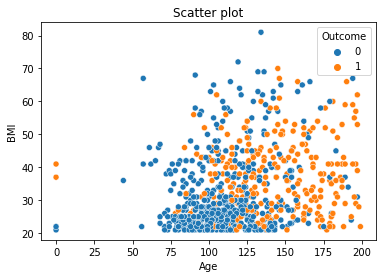

In [11]:
#Scatter plot or glucose vs age
fig=plt.figure()
ax = sns.scatterplot(x = df['Glucose'], y = df['Age'], hue = "Outcome",
                    data = df)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_title('Scatter plot')
plt.show()
#We see that most young people had glucose level below 125 and were not affected by diabetes.

In [12]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

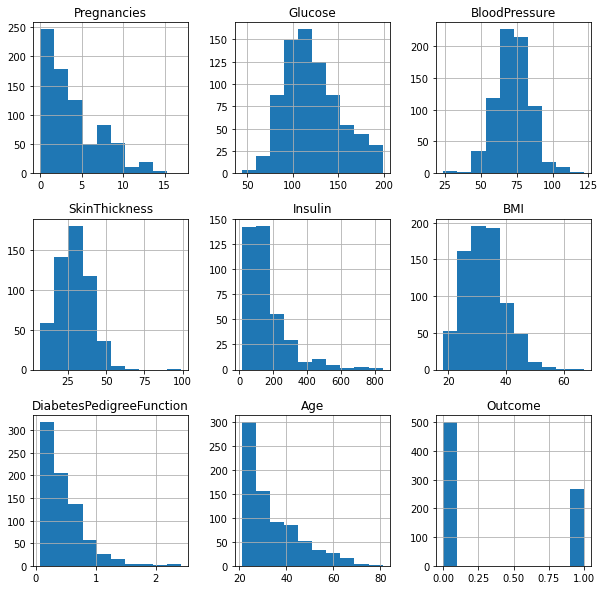

In [13]:
#plotting histogram
p = df_copy.hist(figsize=(10,10))

In [14]:
# Replacing NaN value by mean, median depending upon symmetric/asymmetric distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)
df_copy['DiabetesPedigreeFunction'].fillna(df_copy['DiabetesPedigreeFunction'].median(), inplace=True)

In [15]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#Spitting data
X= df_copy.drop('Outcome', axis= 1)
y= df_copy.Outcome

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20, stratify = y)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Finding the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model_data = []
listOfModels = [LogisticRegression(), KNeighborsClassifier(), SVC(), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in listOfModels:
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    model_data.append([model.__class__.__name__, accuracy_score(y_test, y_pred)])
    
model_data_frame = pd.DataFrame(columns=["Model", "Accuracy_Score"], data=model_data)
print(model_data_frame.sort_values("Accuracy_Score"))
    
    

                        Model  Accuracy_Score
4      DecisionTreeClassifier        0.701299
1        KNeighborsClassifier        0.759740
3  GradientBoostingClassifier        0.766234
5      RandomForestClassifier        0.792208
0          LogisticRegression        0.811688
2                         SVC        0.818182


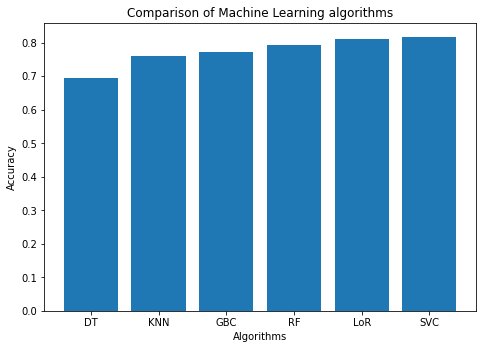

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['DT','KNN','GBC','RF','LoR','SVC']
accuracy = [0.694,0.759,0.772,0.792,0.811,0.818]
ax.bar(models, accuracy)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Algorithms')
ax.set_title('Comparison of Machine Learning algorithms')
plt.show()

# Random Forest

In [20]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
#Randomized Search CV for hyperparameter tuning
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
#using the random grid to search for best hyperparameters
#creating the base model to tune
rf = RandomForestClassifier()

#random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
model_1 = RandomizedSearchCV(rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

#fitting the random search mode
model_1.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [25]:
model_1.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 66,
 'bootstrap': True}

In [26]:
# Manually provide the best parameters to model for training
model = RandomForestClassifier(**{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 88,
 'bootstrap': True})

result_1= model.fit(X_train, y_train)

In [27]:
pred_1 = result_1.predict(X_test)

In [28]:
score = round(accuracy_score(y_test, pred_1),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 79.22%


In [29]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred_1))

0.4558423058385518

# Logistic Regression

In [30]:
#Logictic Regression
#using grid search for hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

lor = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#defining search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1,10, 20, 100]

model_2= GridSearchCV(lor, space, scoring='accuracy', n_jobs=-1, cv=cv)

model_2.fit(X_train, y_train)
model_2.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_21=LogisticRegression(**{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'})
model_21.fit(X_train, y_train)
pred_2 = model_21.predict(X_test)
score = round(accuracy_score(y_test, pred_2),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 81.17%


# SVC

In [32]:
#Support Vector Classifier
svc= SVC()
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_3 = GridSearchCV(svc, param_grid, refit = True, verbose = 3,cv=cv) 
  
# fitting the model for grid search 
model_3.fit(X_train, y_train) 

model_3.best_params_

0.01, kernel=linear, score=0.869, total=   2.9s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.758, total=   2.8s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.742, total=   1.7s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.677, total=   2.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.742, total=   1.5s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.738, total=   2.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.820, total=   2.2s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, 

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [33]:
from sklearn.metrics import accuracy_score

model_31=SVC(**{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'})
model_31.fit(X_train, y_train)
pred_3 = model_31.predict(X_test)

# Accuracy Score
score = round(accuracy_score(y_test, pred_3),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 81.17%


# Gradient Boosting Classifer

In [34]:
#Gradient Boosting Classifier
# Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
# Using the random grid to search for best hyperparameters

gbc = GradientBoostingClassifier()

model_4 = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 20, n_jobs = -1)

model_4.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=20, verbose=2)

In [35]:
model_4.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 88}

In [36]:
model_41 = GradientBoostingClassifier(**{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 55})

result_4= model_41.fit(X_train, y_train)

In [37]:
pred_4 = result_4.predict(X_test)

In [38]:
score = round(accuracy_score(y_test, pred_4),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 80.52%


In [44]:
# accuracy of svc
score = round(accuracy_score(y_test, pred_2),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 81.17%


In [45]:
# Classification Report for SVC
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       100
           1       0.86      0.56      0.67        54

    accuracy                           0.81       154
   macro avg       0.83      0.75      0.77       154
weighted avg       0.82      0.81      0.80       154



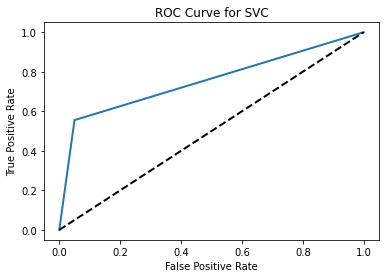

In [46]:
from sklearn.metrics import roc_curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for SVC')
    plt.show()
fpr, tpr, t = roc_curve(y_test, pred_2)
plot_roc()

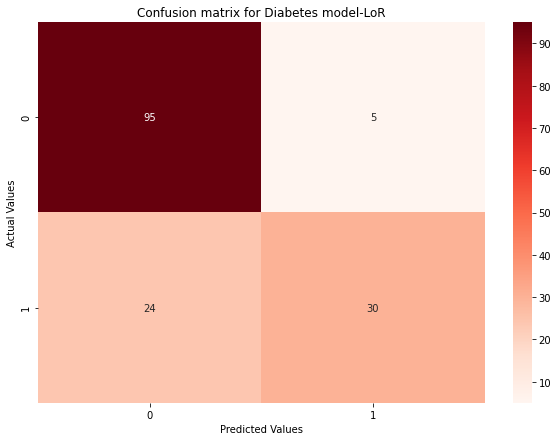

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_2)
cm

#Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix for Diabetes model-LoR')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [49]:
# open a file, where you ant to store the data
file = open('Diabetes_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_21, file)